# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import contextily as cx

# Load data

## Sensors location

In [2]:
# Sensors location
gdf = pd.read_csv('raw/avg_traffic_data_now_xy.csv')

In [4]:
gdf = gpd.GeoDataFrame(
    gdf,
    geometry = gpd.points_from_xy(gdf.x, gdf.y),
    crs = 'epsg:4326'
)

In [7]:
# only a few device IDs are close to Riga
device_ids = [
    2052,
    43,
    45,
    38,
    24,34,32
]

(23.81818771362305, 24.433377071346527, 56.800950586394904, 57.136332469953814)

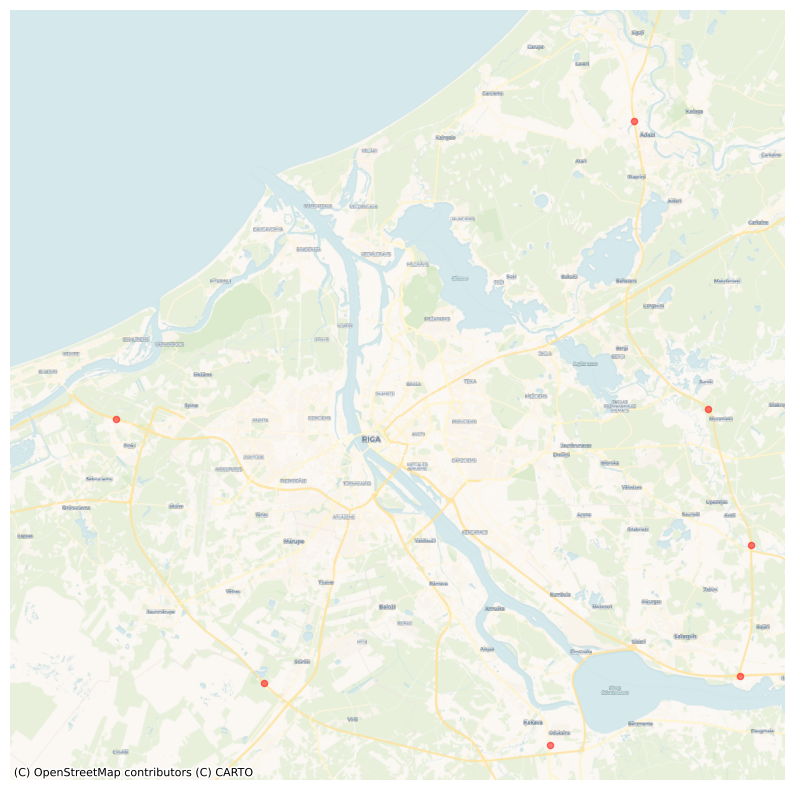

In [8]:
# Plot sensors
ax = gdf[gdf.DEVICE_ID.isin(device_ids)].plot(color = 'r', markersize = 20, alpha = .5, figsize = (6,6))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')
plt.axis('auto')

# Traffic data - year aggregation

In [9]:
df = pd.read_csv('raw/avg_traffic_data_year.csv')

In [11]:
df = df[df.DEVICE_ID.isin(device_ids)]
df

,ID,START_INTERVAL,END_INTERVAL,DEVICE_ID,AVG_SPEED,MAX_SPEED,MIN_SPEED,VEHICLES_COUNT,AVG_LENGTH,MAX_LENGTH,MIN_LENGTH,monthno,HEAVY_VEHICLE_PERC
7,8,2024-07-01 00:00:00,2024-07-31 23:59:59,43,84.298,231.0,1.0,533246,\N,\N,\N,\N,22.16
20,21,2024-07-01 00:00:00,2024-07-31 23:59:59,24,79.878,255.0,1.0,296533,\N,\N,\N,\N,33.52
21,22,2024-02-01 00:00:00,2024-02-29 23:59:59,2052,96.668,218.0,14.0,1006604,\N,\N,\N,\N,9.63
30,31,2024-10-01 00:00:00,2024-10-31 23:59:59,24,80.718,180.0,1.0,219713,\N,\N,\N,\N,37.31
32,33,2024-04-01 00:00:00,2024-04-30 23:59:59,38,96.764,252.0,1.0,568078,\N,\N,\N,\N,14.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,443,2024-04-01 00:00:00,2024-04-30 23:59:59,43,85.570,255.0,1.0,458751,\N,\N,\N,\N,24.61
444,445,2025-01-01 00:00:00,2025-01-31 23:59:59,34,71.233,194.0,25.0,12361,\N,\N,\N,\N,19.59
451,452,2024-12-01 00:00:00,2024-12-31 23:59:59,38,95.085,196.0,8.0,555531,\N,\N,\N,\N,12.34
461,462,2024-10-01 00:00:00,2024-10-31 23:59:59,34,70.822,247.0,1.0,368723,\N,\N,\N,\N,35.31


In [13]:
# Drop 2025
df = df[df.START_INTERVAL != '2025-01-01 00:00:00']

df.START_INTERVAL.unique()

array(['2024-07-01 00:00:00', '2024-02-01 00:00:00',
       '2024-10-01 00:00:00', '2024-04-01 00:00:00',
       '2024-01-01 00:00:00', '2024-11-01 00:00:00',
       '2024-08-01 00:00:00', '2024-05-01 00:00:00',
       '2024-06-01 00:00:00', '2024-09-01 00:00:00',
       '2024-03-01 00:00:00', '2024-12-01 00:00:00'], dtype=object)

In [ ]:
pd.date_range()

In [17]:
# Should count the number of days between beginiing and end
df.reset_index(inplace=True)

# It's moslty monthly census - so same weight approximately
l_nb_days = []
for k in df.index :
    start, end = df.loc[k][['START_INTERVAL', 'END_INTERVAL']].values
    l_nb_days.append(pd.date_range(start, end, freq = 'd').size)

df['nb_days'] = l_nb_days
df['AADT'] = df['VEHICLES_COUNT'] / df['nb_days']
df

C:\Users\xbonnema\AppData\Local\Temp\ipykernel_9020\980964419.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nb_days'] = l_nb_days
C:\Users\xbonnema\AppData\Local\Temp\ipykernel_9020\980964419.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AADT'] = df['VEHICLES_COUNT'] / df['nb_days']


,level_0,index,ID,START_INTERVAL,END_INTERVAL,DEVICE_ID,AVG_SPEED,MAX_SPEED,MIN_SPEED,VEHICLES_COUNT,AVG_LENGTH,MAX_LENGTH,MIN_LENGTH,monthno,HEAVY_VEHICLE_PERC,nb_days,AADT
0,0,7,8,2024-07-01 00:00:00,2024-07-31 23:59:59,43,84.298,231.0,1.0,533246,\N,\N,\N,\N,22.16,31,17201.483871
1,1,20,21,2024-07-01 00:00:00,2024-07-31 23:59:59,24,79.878,255.0,1.0,296533,\N,\N,\N,\N,33.52,31,9565.580645
2,2,21,22,2024-02-01 00:00:00,2024-02-29 23:59:59,2052,96.668,218.0,14.0,1006604,\N,\N,\N,\N,9.63,29,34710.482759
3,3,30,31,2024-10-01 00:00:00,2024-10-31 23:59:59,24,80.718,180.0,1.0,219713,\N,\N,\N,\N,37.31,31,7087.516129
4,4,32,33,2024-04-01 00:00:00,2024-04-30 23:59:59,38,96.764,252.0,1.0,568078,\N,\N,\N,\N,14.44,30,18935.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,432,433,2024-01-01 00:00:00,2024-01-31 23:59:59,43,82.122,200.0,4.0,272349,\N,\N,\N,\N,22.28,31,8785.451613
74,74,442,443,2024-04-01 00:00:00,2024-04-30 23:59:59,43,85.570,255.0,1.0,458751,\N,\N,\N,\N,24.61,30,15291.700000
75,75,451,452,2024-12-01 00:00:00,2024-12-31 23:59:59,38,95.085,196.0,8.0,555531,\N,\N,\N,\N,12.34,31,17920.354839
76,76,461,462,2024-10-01 00:00:00,2024-10-31 23:59:59,34,70.822,247.0,1.0,368723,\N,\N,\N,\N,35.31,31,11894.290323


In [23]:
df = df.groupby('DEVICE_ID').agg(
    AADT = ('AADT', 'mean'),
    savg = ('AVG_SPEED', 'mean'),
    TR_pct_AADT = ('HEAVY_VEHICLE_PERC', 'mean')
)

In [26]:
gdf = df.join(
    gdf.set_index('DEVICE_ID'),
    how = 'inner'
)
gdf

,AADT,savg,TR_pct_AADT,NR,x,y,NAME,START,END,AVG_SPEED,AVG_LENGTH,MAX_SPEED,MAX_LENGTH,MIN_LENGTH,MIN_SPEED,VEHICLES_COUNT,HEAVY_VEHICLE_PERC,geometry
DEVICE_ID,,,,,,,,,,,,,,,,,,
24,8361.446882,80.527917,36.848333,14,24.406482,56.903287,A4 14,2025-01-02 18:20:00,2025-01-02 18:30:00,76.633,9.220,61.0,18.93,4.11,54.0,438,32.88,POINT (24.40648 56.90329)
32,13436.678478,80.075545,26.413636,1,24.313568,57.087778,A1 9,2025-01-02 18:40:00,2025-01-02 18:50:00,65.500,10.241,85.0,19.23,4.13,47.0,630,20.00,POINT (24.31357 57.08778)
34,10030.469892,71.111714,31.577143,13,24.372046,56.962499,A4 7,2025-01-02 18:30:00,2025-01-02 18:40:00,71.422,10.430,65.0,19.16,3.96,48.0,528,27.27,POINT (24.37205 56.96250)
38,17312.117155,97.035667,13.899167,19,24.397802,56.846312,A6 23,2025-01-02 18:20:00,2025-01-02 18:30:00,93.854,9.445,75.0,19.82,4.01,68.0,1038,9.25,POINT (24.39780 56.84631)
43,14811.223962,84.911917,22.951667,16,24.020110,56.843209,A5 23,2025-01-02 18:40:00,2025-01-02 18:50:00,86.908,8.991,68.0,17.20,4.04,67.0,504,9.52,POINT (24.02011 56.84321)
45,8580.272961,64.273833,17.330000,45,24.246731,56.816011,P137 8,2025-01-02 18:40:00,2025-01-02 18:50:00,61.444,9.796,64.0,17.92,4.02,48.0,426,11.27,POINT (24.24673 56.81601)
2052,43746.269262,101.146417,9.582500,31,23.902477,56.958307,A10 17,2025-01-02 18:40:00,2025-01-02 18:50:00,95.295,8.890,91.0,18.82,2.29,46.0,2148,6.42,POINT (23.90248 56.95831)


In [28]:
gdf.rename(columns = {'NAME':'Street_name'}, inplace=True)

# Map matching with OSM

In [29]:
import osmnx as ox
from tqdm import tqdm
from shapely.geometry import Point
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Avoid creating cache
ox.config(use_cache=False, log_console=False)

In [31]:
highway_importance = {
    "motorway": 1,
    "motorway_link": 2,
    "trunk": 3,
    "trunk_link": 4,
    "primary": 5,
    "primary_link": 6,
    "secondary": 7,
    "secondary_link": 8,
    "tertiary": 9,
    "tertiary_link": 10,
    "unclassified": 11,
    "residential": 12,
    "service": 13,
    "living_street": 14,
    "track": 15,
    "path": 16,
    "footway": 17,
    "cycleway": 18,
    "bridleway": 19,
    "other": 20,  # Default for unclassified roads
}


In [35]:
# Define search radius in meters
radius = 30

# Initialize a list to store results
closest_roads = []
highways = []
distances = []
osmids = []

# Iterate over each sensor point
for idx in tqdm(gdf.index):
    # retrieve sensor location
    point = gdf.loc[idx].geometry
    # OSMnx uses (latitude, longitude)
    point = (point.y, point.x)
    
    try :

        # Download the road network within the radius
        G = ox.graph_from_point(point, dist=radius, network_type="drive", 
                                simplify=False, # To avoid having list in the features values
                                retain_all=True, truncate_by_edge=True)

        # Convert the road network to a GeoDataFrame
        gdf_edges = ox.graph_to_gdfs(G, nodes = False)

        # Assign distance metric  
        # (warning : change the crs to 6933 to get results in meter, otherwise the distance values are likely incorrect)
        gdf_edges["distance"] = gdf_edges.to_crs(epsg=6933).geometry.distance(
            gpd.GeoSeries(Point(point[::-1]), crs = 'epsg:4326').to_crs(epsg=6933).values[0]
        )
     
        # Assign importance ranking
        gdf_edges["importance"] = gdf_edges["highway"].map(lambda x: highway_importance.get(x, highway_importance["other"]))

        # Find the closest edge based on importance and then distance
        closest_edge = gdf_edges.sort_values(by=["importance", "distance"]).iloc[0]
        
        # Append result with relevant information
        closest_roads.append(closest_edge["name"] if "name" in closest_edge else "Unnamed Road")
        highways.append(closest_edge["highway"] if "highway" in closest_edge else None)
        distances.append( closest_edge["distance"])
        osmids.append(closest_edge["osmid"])
        
    except :
       # Fill wit NaN values
        closest_roads.append(np.nan)
        highways.append(np.nan)
        distances.append(np.nan)
        osmids.append(np.nan)

# Update results in gdf
gdf['closest_road'] = closest_roads
gdf['highway'] = highways
gdf['distance'] = distances
gdf['osmid'] = osmids

100%|██████████| 7/7 [00:09<00:00,  1.42s/it]


In [36]:
print('Missing match', gdf.closest_road.isna().sum())
print('...on a total of', gdf.shape[0], 'sensors')

Missing match 2
...on a total of 7 sensors


In [38]:
gdf[['Street_name', 'closest_road', 'highway']]

,Street_name,closest_road,highway
DEVICE_ID,,,
24,A4 14,Unnamed Road,trunk
32,A1 9,Rīga (Baltezers) — Igaunijas robeža (Ainaži),trunk
34,A4 7,Unnamed Road,trunk
38,A6 23,NaN,NaN
43,A5 23,NaN,NaN
45,P137 8,Rīga — Bauska — Lietuvas robeža (Grenctāle),primary
2052,A10 17,Rīga — Ventspils,trunk


# Final saving

In [40]:
gpd.GeoDataFrame(
    gdf[[
    'AADT', 'Street_name', 'geometry', 'closest_road', 'highway','osmid', 'distance'
    ]],
    geometry = 'geometry',
    crs = 'epsg:4326'
    
    ).to_file(
    'treated/Riga_AADT_2024.geojson'
)